In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler


In [37]:
test_X = pd.read_csv('D:\\FinalDataMining\\Drought-Modeling\\test_timeseries.csv')
train_X = pd.read_csv('D:\\FinalDataMining\\Drought-Modeling\\train_timeseries.csv')
valid_X = pd.read_csv('D:\\FinalDataMining\\Drought-Modeling\\validation_timeseries.csv')

test_X = test_X[test_X['score'].notnull()].reset_index(drop=True)
train_X = train_X[train_X['score'].notnull()].reset_index(drop=True)
valid_X = valid_X[valid_X['score'].notnull()].reset_index(drop=True)

train_X = train_X.sample(n=1000000, random_state=42)
test_X = test_X.sample(n=1000000, random_state=42)
valid_X = valid_X.sample(n=1000000, random_state=42)

<bound method NDFrame.describe of          fips        date  PRECTOT      PS  QV2M    T2M  T2MDEW  T2MWET   
0        1001  2000-01-04    15.95  100.29  6.42  11.40    6.09    6.10  \
1        1001  2000-01-11     1.33  100.40  6.63  11.48    7.84    7.84   
2        1001  2000-01-18     1.11  100.39  9.53  14.28   13.26   13.26   
3        1001  2000-01-25     0.00  100.11  2.05  -0.78   -7.93   -7.72   
4        1001  2000-02-01     0.00  101.00  3.36   2.06   -1.73   -1.70   
...       ...         ...      ...     ...   ...    ...     ...     ...   
499995  17005  2011-10-11     0.13   99.49  9.97  20.03   13.87   13.87   
499996  17005  2011-10-18    17.09   99.12  5.42   7.07    4.79    4.79   
499997  17005  2011-10-25     0.01   99.62  6.47  16.24    7.35    7.36   
499998  17005  2011-11-01     0.01  100.11  4.63  11.07    2.66    2.69   
499999  17005  2011-11-08     0.84   99.49  9.50  16.65   13.13   13.13   

        T2M_MAX  T2M_MIN  ...     TS  WS10M  WS10M_MAX  WS10M_MIN

In [38]:
score_5_rows = train_X[train_X['score'] == 5]
num_rows_score_5 = len(score_5_rows)
print("Number of rows where the score is 5:", num_rows_score_5)

Number of rows where the score is 5: 7918


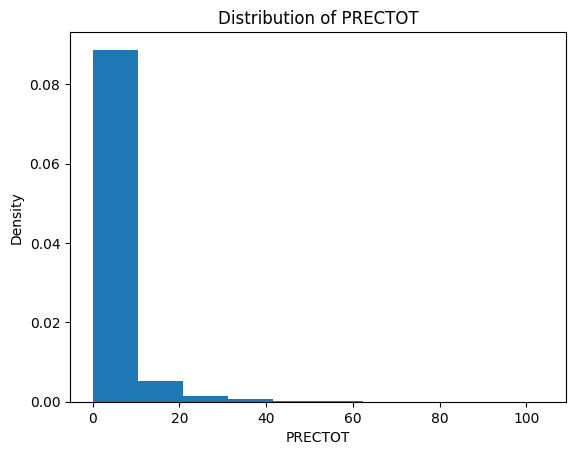

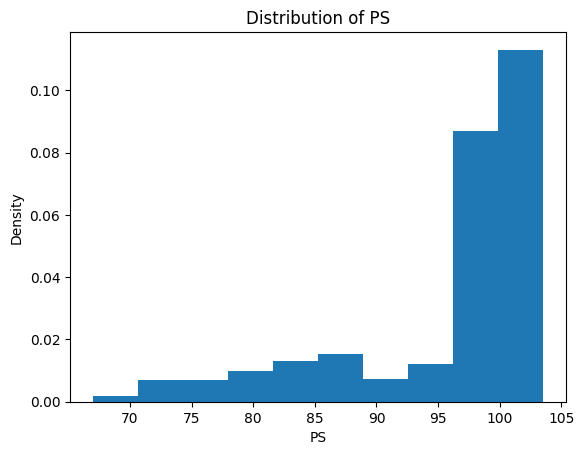

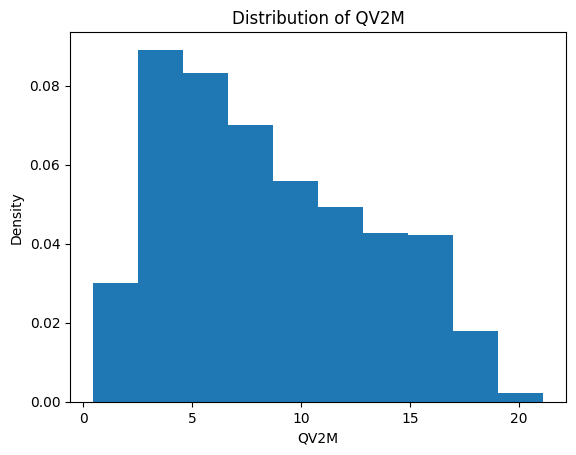

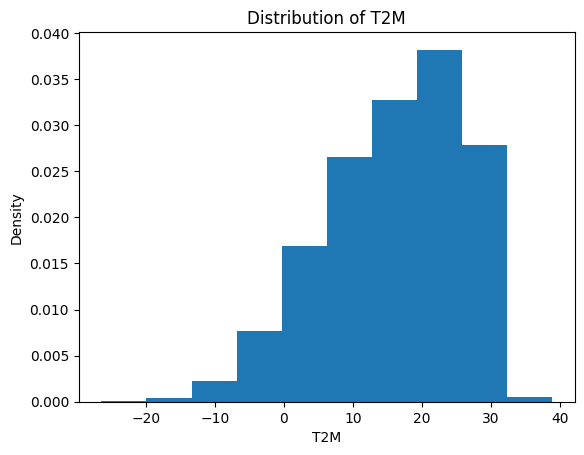

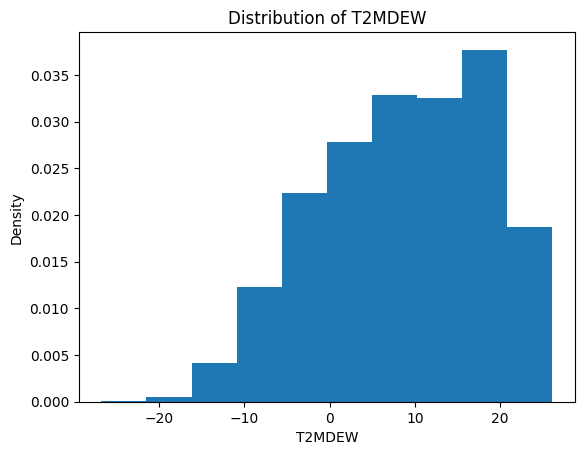

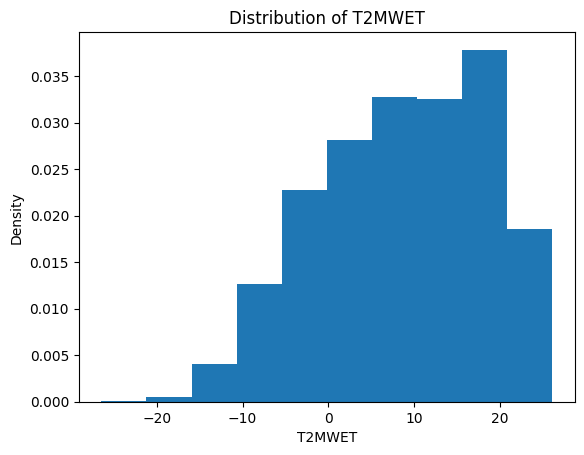

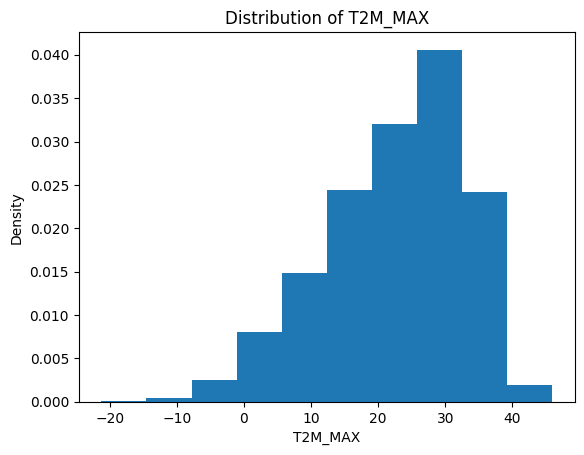

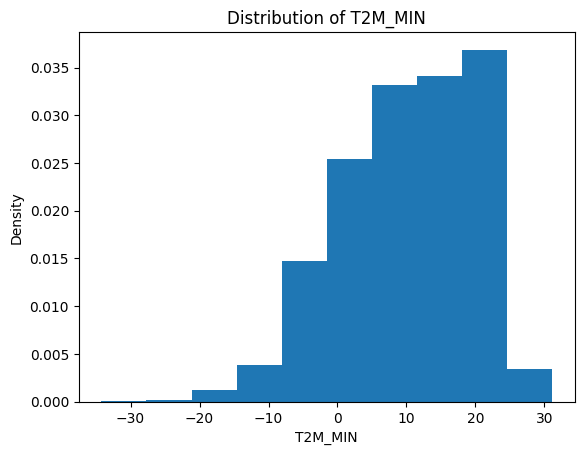

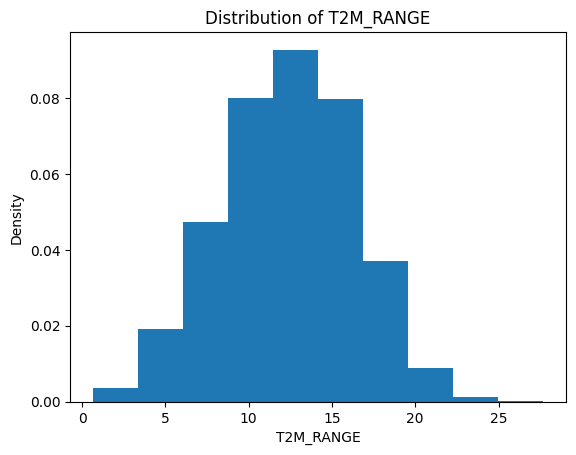

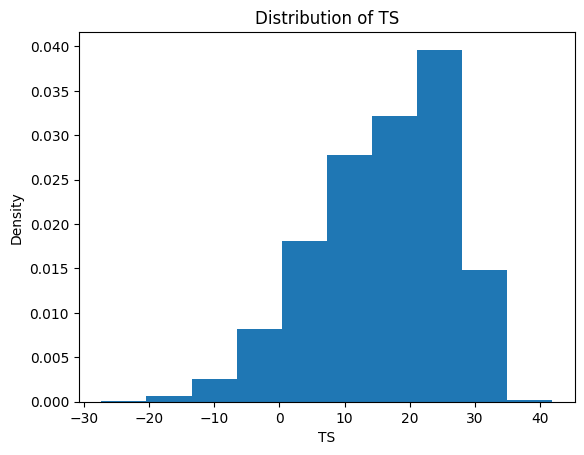

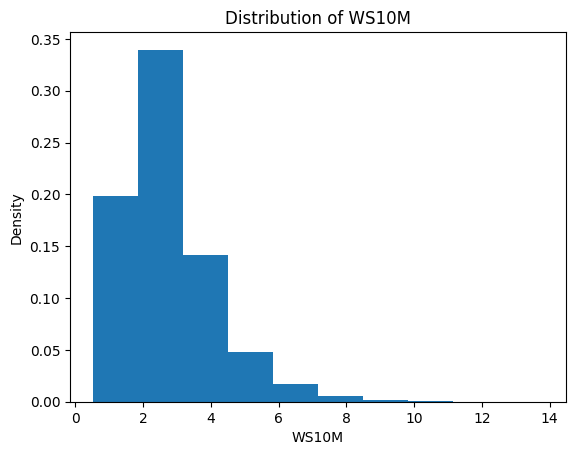

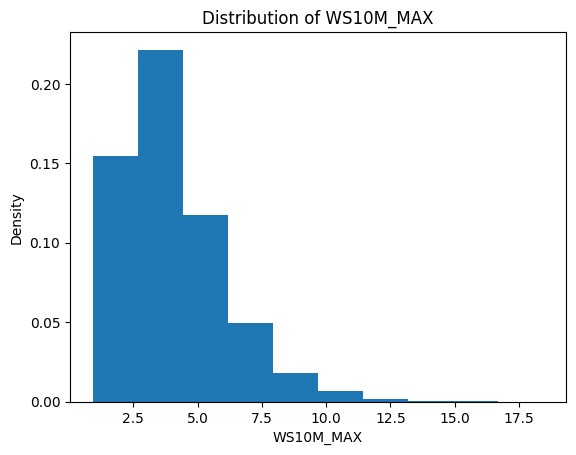

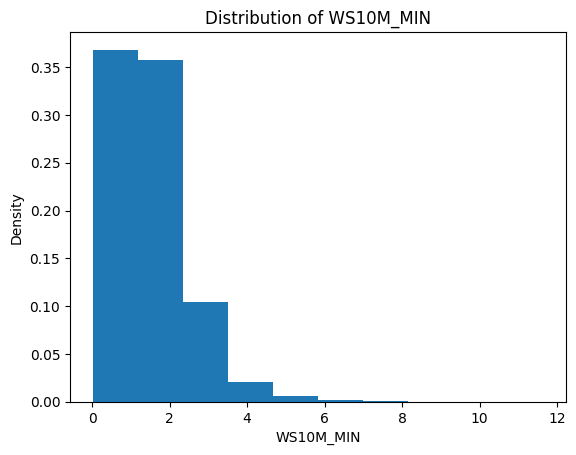

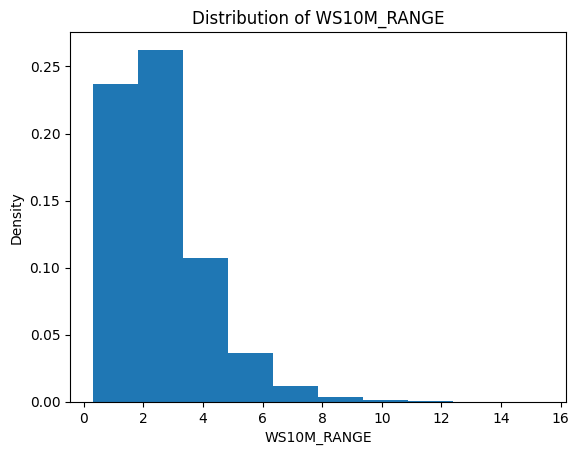

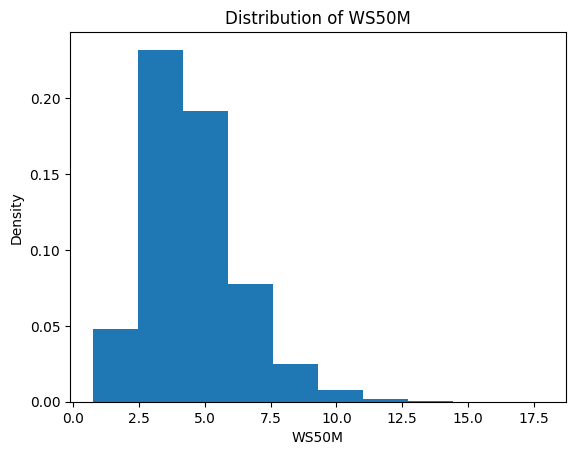

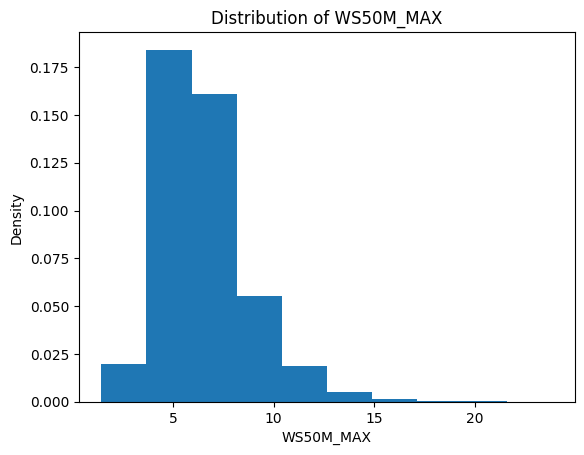

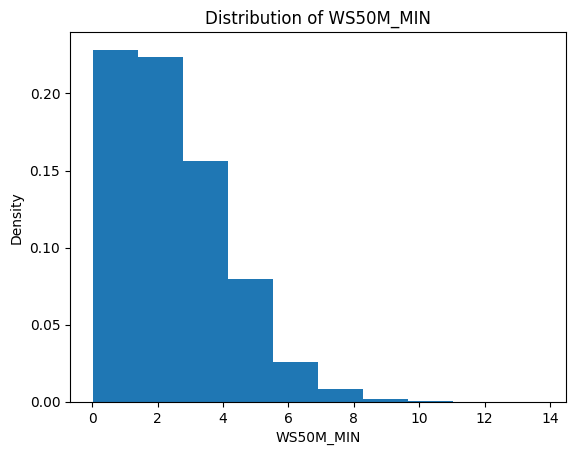

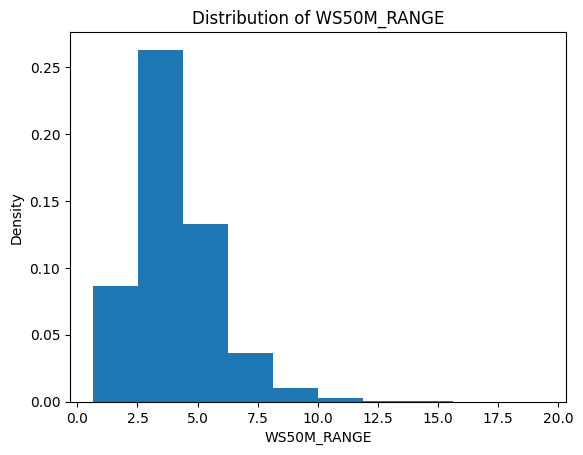

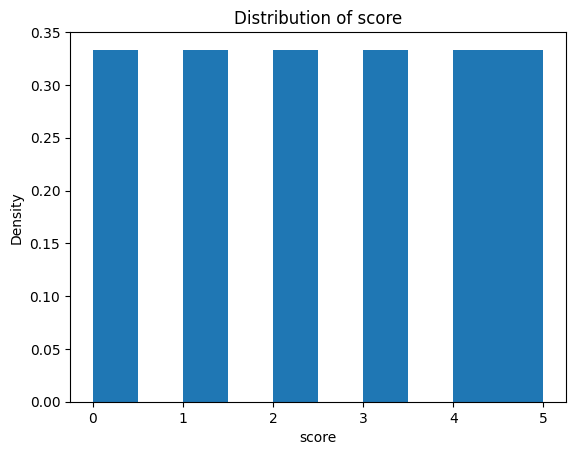

In [40]:
measuresCols = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'score']

for col_name in measuresCols:
    plt.figure()
    plt.hist(train_X[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

In [41]:
corr_X = test_X[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'score']]
correlation_plot = corr_X.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
PRECTOT,1.000000,0.094530,0.221555,0.065489,0.206614,0.204426,-0.000154,0.115706,-0.309629,0.064381,0.057027,0.066471,0.028839,0.067855,0.062119,0.066303,0.056525,0.031788,-0.053725
PS,0.094530,1.000000,0.366746,0.248061,0.453221,0.454892,0.184685,0.298730,-0.262673,0.248025,-0.091143,-0.148787,0.025066,-0.210448,-0.044663,-0.094207,0.038096,-0.154183,-0.342555
QV2M,0.221555,0.366746,1.000000,0.862093,0.956895,0.960175,0.792211,0.898973,-0.104821,0.854704,-0.208881,-0.240431,-0.079394,-0.261733,-0.194757,-0.235060,-0.060259,-0.241728,-0.132779
T2M,0.065489,0.248061,0.862093,1.000000,0.898715,0.897452,0.982880,0.982565,0.224738,0.997275,-0.205431,-0.216819,-0.110027,-0.210920,-0.197538,-0.204247,-0.108685,-0.158184,0.018426
T2MDEW,0.206614,0.453221,0.956895,0.898715,1.000000,0.997536,0.835049,0.926403,-0.053886,0.891812,-0.220700,-0.253861,-0.081968,-0.277568,-0.190527,-0.229822,-0.059194,-0.236083,-0.148302
T2MWET,0.204426,0.454892,0.960175,0.897452,0.997536,1.000000,0.833590,0.927044,-0.059830,0.889855,-0.221198,-0.254707,-0.081576,-0.278929,-0.191030,-0.230257,-0.059463,-0.236387,-0.136113
T2M_MAX,-0.000154,0.184685,0.792211,0.982880,0.835049,0.833590,1.000000,0.938824,0.391268,0.978905,-0.217100,-0.221062,-0.128311,-0.204506,-0.202016,-0.196346,-0.131458,-0.127228,0.064719
T2M_MIN,0.115706,0.298730,0.898973,0.982565,0.926403,0.927044,0.938824,1.000000,0.050390,0.979976,-0.203494,-0.221557,-0.097409,-0.225343,-0.201460,-0.221086,-0.092452,-0.194420,-0.010956
T2M_RANGE,-0.309629,-0.262673,-0.104821,0.224738,-0.053886,-0.059830,0.391268,0.050390,1.000000,0.220127,-0.085809,-0.049033,-0.111803,0.009094,-0.047503,0.021384,-0.134177,0.150568,0.216952
TS,0.064381,0.248025,0.854704,0.997275,0.891812,0.889855,0.978905,0.979976,0.220127,1.000000,-0.186927,-0.198732,-0.095441,-0.196858,-0.185015,-0.190516,-0.098941,-0.149794,0.017638


C:\Users\fantu\AppData\Local\Temp\ipykernel_14880\2859240047.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_Y.loc[(input_Y['score'] > 0) & (input_Y['score'] <= 1), 'score'] = 1
C:\Users\fantu\AppData\Local\Temp\ipykernel_14880\2859240047.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_Y.loc[(input_Y['score'] > 1) & (input_Y['score'] <= 2), 'score'] = 2
C:\Users\fantu\AppData\Local\Temp\ipykernel_14880\2859240047.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

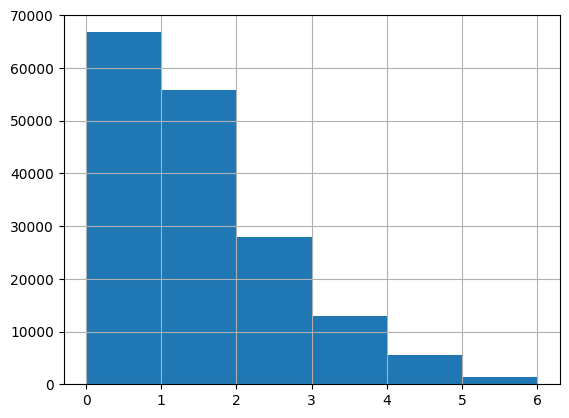

In [42]:
test_Y_save = test_X[['fips', 'score']]
train_Y_save = train_X[['fips', 'score']]
valid_Y_save = valid_X[['fips', 'score']]

test_Y = test_X[['score']]
train_Y= train_X[['score']]
valid_Y = valid_X[['score']]

# converting targets to integers
def convert_float_score_into_int_score(input_Y):
    input_Y.loc[(input_Y['score'] > 0) & (input_Y['score'] <= 1), 'score'] = 1
    input_Y.loc[(input_Y['score'] > 1) & (input_Y['score'] <= 2), 'score'] = 2
    input_Y.loc[(input_Y['score'] > 2) & (input_Y['score'] <= 3), 'score'] = 3
    input_Y.loc[(input_Y['score'] > 3) & (input_Y['score'] <= 4), 'score'] = 4
    input_Y.loc[(input_Y['score'] > 4), 'score'] = 5
    input_Y['score'] = input_Y['score'].astype('int')
    return input_Y
test_Y = convert_float_score_into_int_score(test_Y)
train_Y = convert_float_score_into_int_score(train_Y)
valid_Y = convert_float_score_into_int_score(valid_Y)
test_Y['score'].hist(bins=[0, 1, 2, 3, 4, 5, 6])

test_X.drop('date', axis=1, inplace=True)
train_X.drop('date', axis=1, inplace=True)
valid_X.drop('date', axis=1, inplace=True)

test_X.drop('score', axis=1, inplace=True)
train_X.drop('score', axis=1, inplace=True)
valid_X.drop('score', axis=1, inplace=True)

In [43]:
scaler = MinMaxScaler()
train_X = pd.DataFrame(np.append(train_X.iloc[:, :2].values, scaler.fit_transform(train_X.iloc[:, 2:]), axis=1), columns=train_X.columns)
valid_X = pd.DataFrame(np.append(valid_X.iloc[:, :2].values, scaler.transform(valid_X.iloc[:, 2:]), axis=1), columns=valid_X.columns)
test_X = pd.DataFrame(np.append(test_X.iloc[:, :2].values, scaler.transform(test_X.iloc[:, 2:]), axis=1), columns=test_X.columns)

In [ ]:

undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(train_X, train_Y)

# Classification

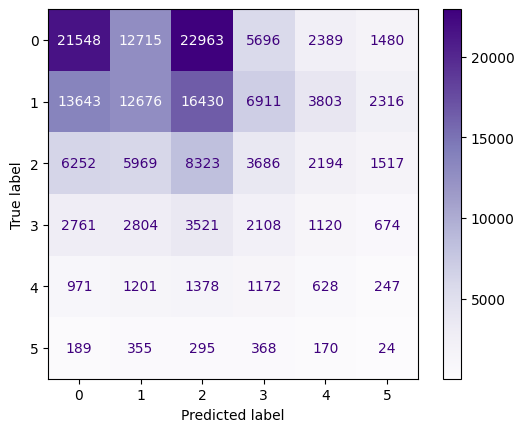

Accuracy:  0.2657348809656475


In [44]:
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(train_X, train_Y)

YPred = clf.predict(test_X)
accuracy = accuracy_score(YPred, test_Y)

cm = confusion_matrix(test_Y, YPred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()
print('Accuracy: ', accuracy)

c:\Users\fantu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


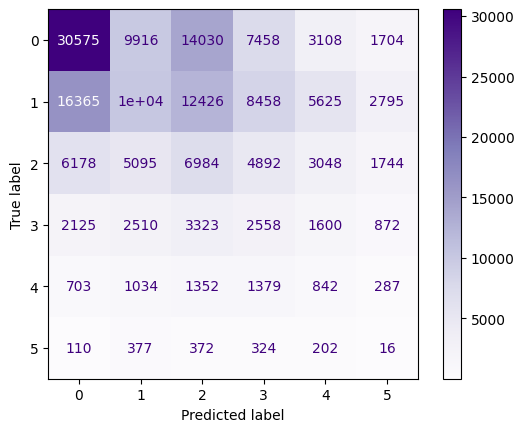

Random Forest Accuracy: 0.2996240403056945


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
rf_clf.fit(train_X, train_Y)

YPred_rf = rf_clf.predict(test_X)
accuracy_rf = accuracy_score(YPred_rf, test_Y)
cm_rf = confusion_matrix(test_Y, YPred_rf, labels=rf_clf.classes_)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap='Purples')
plt.show()

print('Random Forest Accuracy:', accuracy_rf)

c:\Users\fantu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.3029965336633489


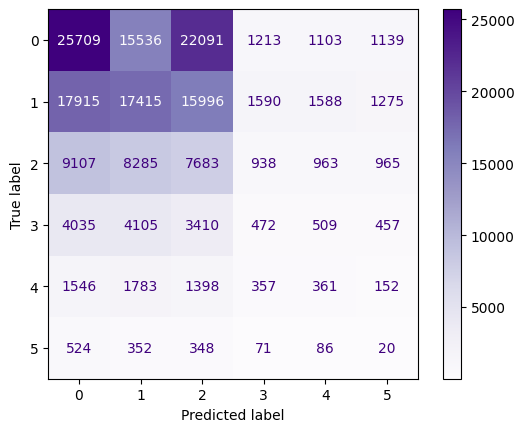

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(train_X, train_Y)


YPred = knn.predict(test_X)
accuracy = accuracy_score(test_Y, YPred)
print('Accuracy:', accuracy)

cm = confusion_matrix(test_Y, YPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Purples')

# Clustering

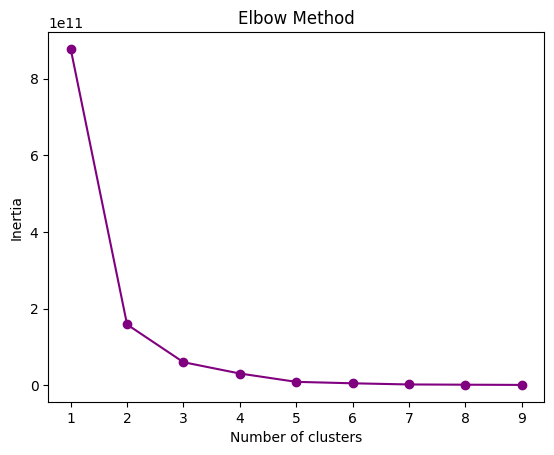

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(train_X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o", color = 'purple')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 5

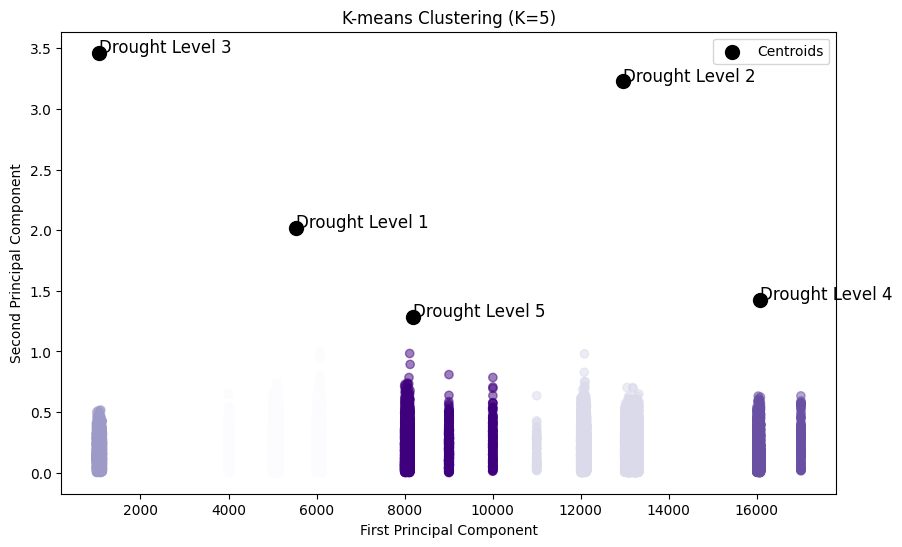

In [53]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(train_X)
centroids = kmeans.cluster_centers_

# Create a new figure
plt.figure(figsize=(10, 6)) 

# Plot the data points with their cluster labels
plt.scatter(train_X.iloc[:, 0], train_X.iloc[:, 17], c=kmeans.labels_, cmap='Purples', alpha=0.5)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='o', label='Centroids')

# Annotate centroids
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f"Drought Level {i + 1}", fontsize=12, color='black')

# Set labels and title
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.legend()

# Show the plot
plt.show()